In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('dataset_avaliacoes.csv')

df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento  
0   positivo  
1   negativo  
2   negativo  
3   positivo  
4   positivo

In [5]:
# verificar a quantidade linhas e colunas
df.shape

(15501, 4)

In [6]:
# contar a quantidade de registros da coluna sentimentos
df.value_counts('sentimento')

sentimento
positivo    7890
negativo    7611
Name: count, dtype: int64

In [7]:
# imprimindo a primeira avaliaçao positiva da posicao 0
print('positiva \n')
df.avaliacao[0]

positiva 



'Esse smartphone superou minhas expectativas, recomendo'

In [8]:
# imprimindo a primeira avaliaçao negativa da posicao 1
print('negativa \n')
df.avaliacao[2]

negativa 



'Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra.'

Vamos tranformar dados NÃO ESTRUTURADOA em dados ESTRUTURADO em formato de numeros para o modelo entender.

Tecnica Bag Of Words.
1 - temos que pegar todas as palavras e verificar sua frequencia. Apos isso colar em uma matriz em cada uma das avaliações que temos.(matrix esparsa)

##**Transformando textos em dados numéricos**
Vamos ter uma matriz que contem os números de acordo com essa frequencia

In [ ]:
#baixando a bliblioteca para separar as classificações das avaliações. Vetorizando e transformando em números
from sklearn.feature_extraction.text import CountVectorizer

#instanciando a classe # lowercase=False, para não converter os dados oroginais
vetorizar = CountVectorizer(lowercase=False)

# chamar o metodo vetorizar para dar andamento nos processos
bag_of_words = vetorizar.fit_transform(df.avaliacao)
#consultar a dimenção desse nova matrix
print(bag_of_words.shape)

(15501, 23352)


In [12]:
# limitando a dimenção para limitar o numero maximo de palavras(features) reincidentes para evitar muito processamento do modelo - max_features=50
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(df.avaliacao)

print(bag_of_words.shape)

(15501, 50)


In [14]:
# conversar a matriz esparsa para o formato de DataFrame
# mostra uma matriz com as frequencia de cada palavra(1: contem a palavra, 0: nao contem a palavra). Se a palavra aparecer mais de uma vez é porque existe mais frequencia da palavra
# texto = ['Comprei um produto ótimo', 'Comprei um produto ruim']

matriz_esparsa_avaliacaoes = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())
matriz_esparsa_avaliacaoes

Não  Produto  ainda  antes  as  até  bem  bom  chegou  com  ...  \
0        0        0      0      0   0    0    0    0       0    0  ...   
1        0        0      0      0   0    0    0    0       0    0  ...   
2        0        0      0      0   0    0    0    0       0    0  ...   
3        0        0      0      0   0    0    0    0       0    0  ...   
4        0        0      0      0   0    0    1    0       0    0  ...   
...    ...      ...    ...    ...  ..  ...  ...  ...     ...  ...  ...   
15496    0        0      0      0   0    0    0    0       0    0  ...   
15497    0        0      0      0   0    0    0    0       0    0  ...   
15498    0        0      0      0   0    0    0    0       0    0  ...   
15499    0        1      0      1   0    0    0    1       1    0  ...   
15500    0        0      0      0   0    0    0    0       0    0  ...   

       qualidade  que  recebi  recomendo  se  sem  tem  um  uma  veio  
0              0    0       0          1   0    0    0   0    0     0  
1              0    0       0          0   1    0    0   0    0     0  
2              0    0       0          0   0    0    0   0    0     0  
3              0    1       0          0   0    0    0   0    0     0  
4              1    2       0          0   0    0    0   0    0     0  
...          ...  ...     ...        ...  ..  ...  ...  ..  ...   ...  
15496          0    0       0          1   0    0    0   0    0     0  
15497          0    1       0          0   0    0    1   0    0     0  
15498          0    0       0          0   0    0    0   1    0     0  
15499          0    0       0          0   0    0    0   0    0     0  
15500          0    0       0          0   0    0    0   0    0     0  

[15501 rows x 50 columns]

**Classificando os sentimentos**

  1. Explorar dados textuais;
  2. Utilizar a técnica de Bag of words para converter textos em vetores numéricos;
  3. Separar os dados em treino e teste;
  4. Treinar o modelo de regressão logística;
  5. Obter a acurácia do modelo nos dados de teste.

In [15]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words, df.sentimento, random_state=4978)

In [16]:
from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression()
regressao_logistica.fit(X_treino, y_treino)
acuracia = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia: {acuracia:.2f}')

Acurácia: 0.80


Explorando a frequência e o sentimento das palavras
Visualizando as palavras mais frequentes nas avaliações**

In [78]:
#pip install WordCloud

In [17]:
# importar bliblioteca nuves de palavras para verificarmos as palavras com mais incidencias
from wordcloud import WordCloud


In [18]:
#vamos criar uma lista com todas as palavras existentes no texto
todas_palavras = [texto for texto in df.avaliacao]
todas_palavras


['Esse smartphone superou minhas expectativas, recomendo',
 'o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo..',
 'Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra.',
 'Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento.',
 'Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor .',
 'Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!!',
 'o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado',
 'já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen',
 'nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA 

In [ ]:
# juntas todas as palavras em um unica palavra(texto corrido)
todas_palavras = ' '.join([texto for texto in df.avaliacao])
todas_palavras

'Esse smartphone superou minhas expectativas, recomendo o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo.. Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra. Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento. Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor . Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!! o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA LOGISTICA. Ja solicitei o cancela

In [20]:
nuvem_palavras = WordCloud().generate(todas_palavras)

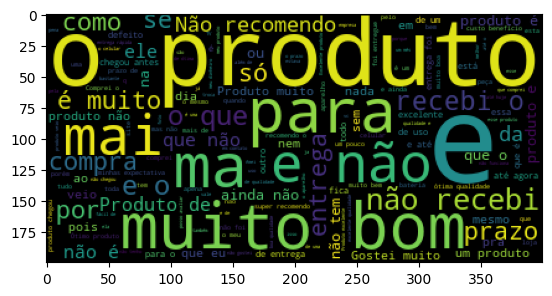

In [21]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(nuvem_palavras)
plt.show()

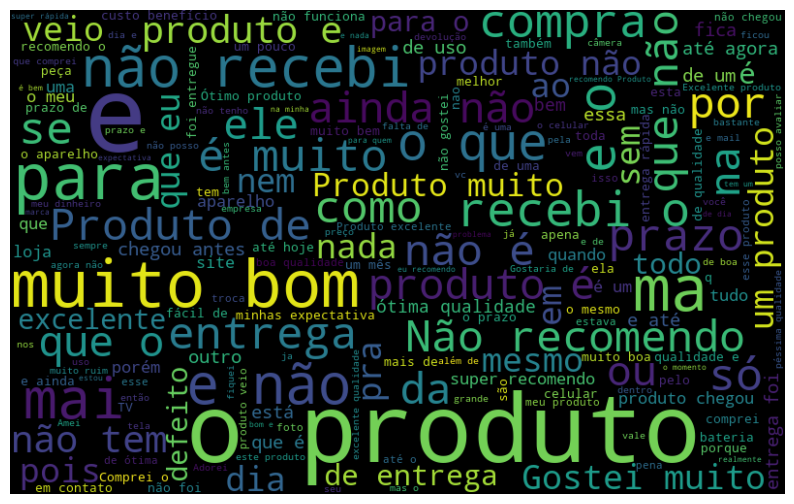

In [22]:
# Criando um graficocom nuvens de palavras
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110).generate(todas_palavras)
plt.figure(figsize=(10, 7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

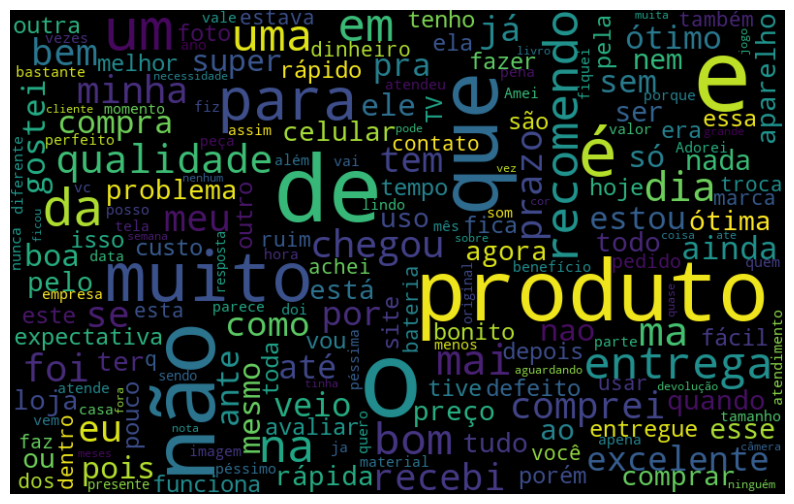

In [23]:
# collocations=False para executar as palavras de forma indidualizadas
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
plt.figure(figsize=(10, 7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
##**Analisando palavras por sentimento NEGATIVA E POSISITA**

In [25]:
# Criando uma função para gerar graficos. Deve informar um texto, avaliacao e sentimento

def nuvem_palavras(texto, coluna_texto, sentimento):
  texto_sentimento = texto.query(f"sentimento == '{sentimento}'")[coluna_texto]

  texto_unido = ' '.join(texto_sentimento)
  nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(texto_unido)
  plt.figure(figsize=(10, 7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off') # não aparecer o eido do grafico
  plt.show()

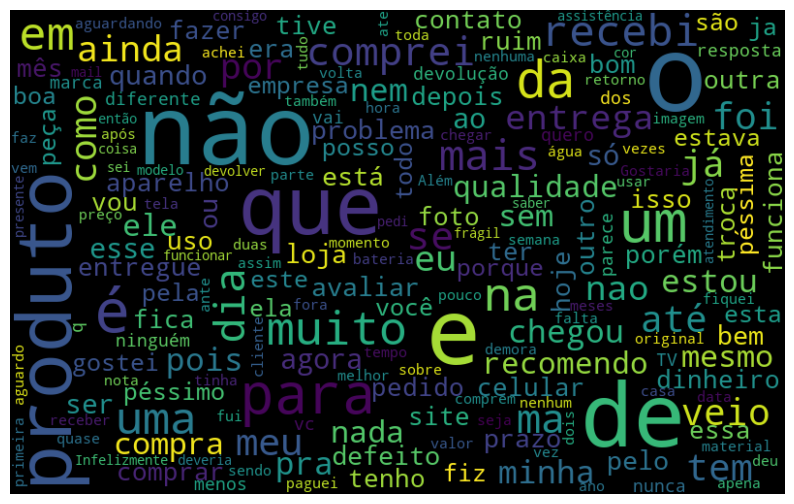

In [26]:
# chamando a funcao
nuvem_palavras(df, 'avaliacao', 'negativo')


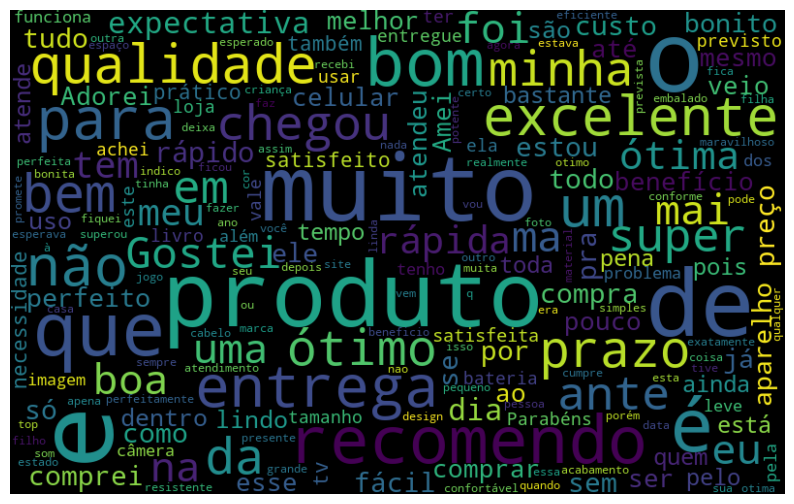

In [27]:
nuvem_palavras(df, 'avaliacao', 'positivo')

In [28]:
# verificar a frequencia numerica das palavras
todas_palavras

'Esse smartphone superou minhas expectativas, recomendo o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo.. Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra. Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento. Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor . Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!! o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA LOGISTICA. Ja solicitei o cancela

In [29]:
#tokenização(tecnica de separar textos em palavras)
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Usuario\AppData\Roaming\nltk

True

In [30]:
frases = ['um produto bom', 'um produto ruim']
frequencia = nltk.FreqDist(frases)
frequencia

FreqDist({'um produto bom': 1, 'um produto ruim': 1})

In [31]:
# implementar a tokenização
from nltk import tokenize

frase = 'o produto é execelente e a entrega foi muito rápida!'
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['o', 'produto', 'é', 'execelente', 'e', 'a', 'entrega', 'foi', 'muito', 'rápida!']


**Analisando a frequência das palavras**

In [32]:
token_frase = token_espaco.tokenize(todas_palavras)
token_frase

['Esse',
 'smartphone',
 'superou',
 'minhas',
 'expectativas,',
 'recomendo',
 'o',
 'cheiro',
 'e',
 'muito',
 'desagradavel!!',
 'pra',
 'quem',
 'se',
 'incomoda',
 'nao',
 'recomendoo..',
 'Eu',
 'fiz',
 'a',
 'compra',
 'a',
 'loja',
 'não',
 'entregou',
 'o',
 'produto,',
 'a',
 'compra',
 'foi',
 'feita',
 'no',
 'cartão',
 'de',
 'credito',
 'e',
 'ate',
 'o',
 'momento',
 'a',
 'loja',
 'também',
 'nao',
 'me',
 'devolveu',
 'o',
 'valor',
 'da',
 'compra.',
 'Atendeu',
 'minhas',
 'expectativas,',
 'só',
 'achei',
 'a',
 'luz',
 'ruim,',
 'mas',
 'nada',
 'que',
 'dificulte',
 'seu',
 'funcionamento.',
 'Gostei',
 'muito,',
 'só',
 'achei',
 'que',
 'ficou',
 'a',
 'desejar',
 'a',
 'qualidade',
 'das',
 'fotos.',
 'Achei',
 'que',
 'fosse',
 'bem',
 'melhor',
 '.',
 'Comprei',
 'o',
 'produto',
 'e',
 'ñ',
 'tinha',
 'para',
 'entrega',
 'isso',
 'não',
 'foi',
 'legal!!!!!!',
 'o',
 'produto',
 'pode',
 'até',
 'ser',
 'bom',
 ',mais',
 'só',
 'posso',
 'avalia-lo',
 'depo

In [33]:
frequencia = nltk.FreqDist(token_frase)
frequencia

FreqDist({'e': 11813, 'o': 10865, 'de': 10280, 'a': 8873, 'que': 7657, 'não': 7286, 'é': 4786, 'produto': 4765, 'com': 4641, 'do': 4583, ...})

# Verificando as frequencias da palavras

In [36]:
df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                              'Frequência': list(frequencia.values())})

df_frequencia.head()

Palavra  Frequência
0           Esse         101
1     smartphone          33
2        superou          90
3         minhas         533
4  expectativas,          79

In [40]:
#comando para verificar as 10  palavras mais frequente
df_frequencia.nlargest(columns='Frequência', n=10)

Palavra  Frequência
8          e       11813
6          o       10865
29        de       10280
19         a        8873
46       que        7657
22       não        7286
163        é        4786
63   produto        4765
177      com        4641
130       do        4583

In [ ]:
#pip install seaborn

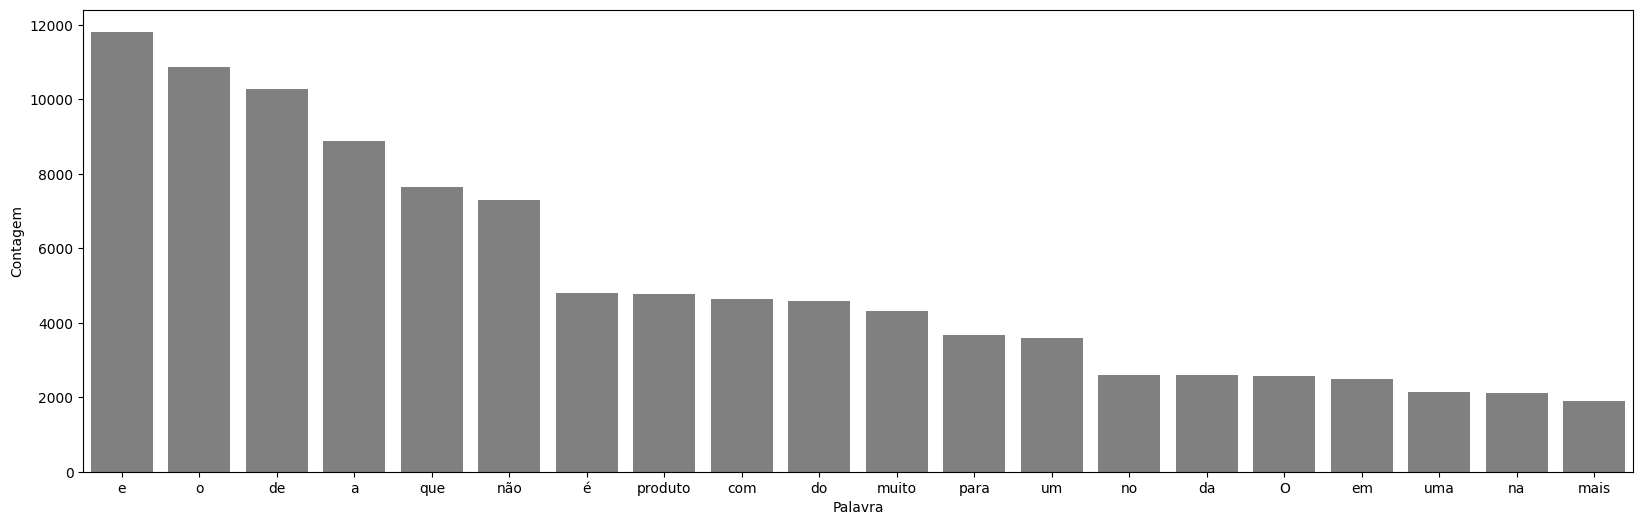

In [46]:
#comando para verificar as 10  palavras mais frequente em forma de graficos
import seaborn as sns
plt.figure(figsize=(20,6))
ax = sns.barplot(data=df_frequencia.nlargest(columns='Frequência', n=20), x='Palavra', y='Frequência', color='gray')
ax.set(ylabel='Contagem')
plt.show()

**Aula 3: Limpando e normalizando dados textuais**


**Removendo stopwords**

In [48]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

In [49]:
frase_processada = []

for opiniao in df.avaliacao:
  palavras_texto = token_espaco.tokenize(opiniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra not in palavras_irrelevantes]
  frase_processada.append(' '.join(nova_frase))

df['tratamento_1'] = frase_processada

df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       tratamento_1  
0   positivo    Esse smartphone superou expectativas, recomendo  
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...  
2   negativo  Eu fiz compra loja entregou produto, compra fe...  
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...  
4   positivo  Gostei muito, achei ficou desejar qualidade fo...

In [50]:
df['avaliacao'][0]

'Esse smartphone superou minhas expectativas, recomendo'

In [51]:
df['tratamento_1'][0]

'Esse smartphone superou expectativas, recomendo'

Função que faça todo esse processo de forma automatizada. A função deverá receber como entrada um conjunto de dados de texto, aplicar o vetor bag of words para transformar o texto em uma representação numérica, dividir os dados em treino e teste, treinar um modelo de regressão logística e avaliar seu desempenho.

In [52]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
    vetorizar = CountVectorizer(lowercase=False, max_features=50)
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    X_treino, X_teste, y_treino, y_teste = train_test_split(bag_of_words, texto[coluna_classificacao], random_state=4978)
    regressao_logistica = LogisticRegression()
    regressao_logistica.fit(X_treino, y_treino)
    acuracia = regressao_logistica.score(X_teste, y_teste)
    return print(f"Acurácia do modelo com '{coluna_texto}': {acuracia * 100:.2f}%")

In [53]:
classificar_texto(df, 'tratamento_1', 'sentimento')

Acurácia do modelo com 'tratamento_1': 81.09%


In [54]:
# função para visualizar a frequência de palavras
def grafico_frequencia(texto, coluna_texto, quantidade):
  # juntando todos os textos em uma única string
  todas_palavras = ' '.join([texto for texto in df[coluna_texto]])

  # calculando a frequência das palavras
  token_espaco = tokenize.WhitespaceTokenizer()
  frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))

  # criando um DataFrame com as palavras e suas frequências
  df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                                'Frequencia': list(frequencia.values())})

  # selecionando as palavras mais frequentes
  df_frequencia = df_frequencia.nlargest(columns='Frequencia', n=quantidade)

  # Criando o gráfico de barras
  plt.figure(figsize=(20, 6))
  ax = sns.barplot(data=df_frequencia, x='Palavra', y='Frequencia', color='gray')
  ax.set(ylabel='Contagem')
  plt.show()

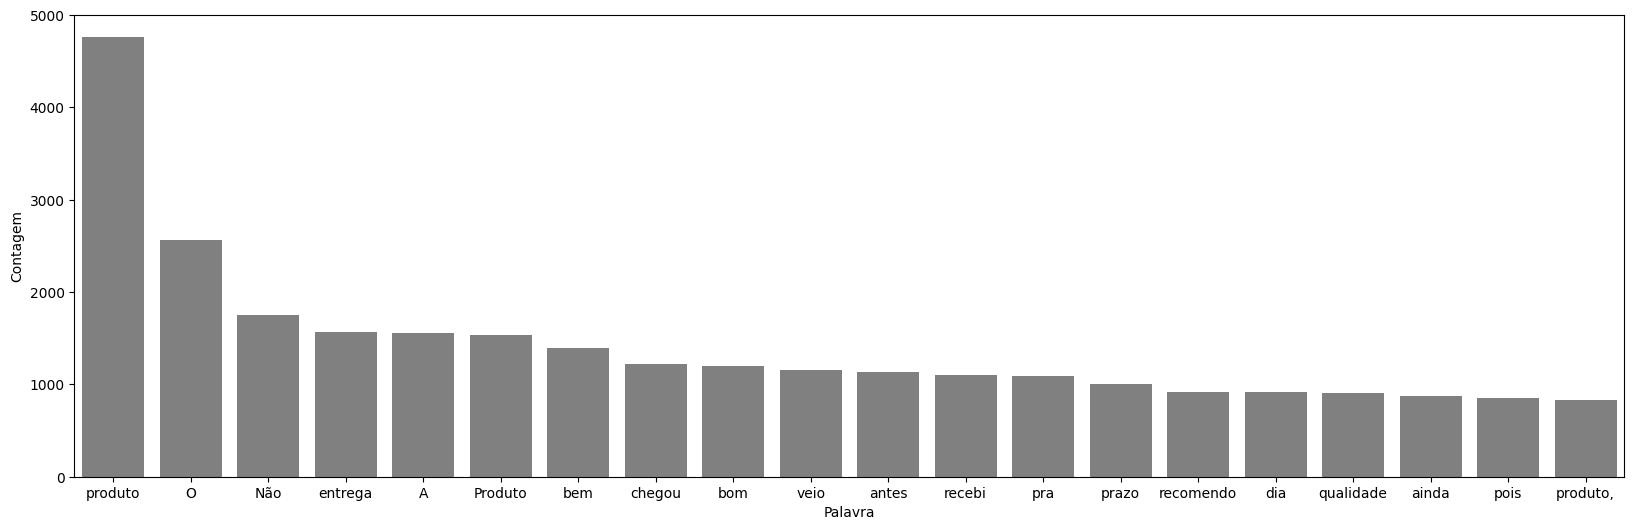

In [ ]:
# chamando a função para gerar o gráfico com as frequência das palavras
grafico_frequencia(df, 'tratamento_1', 20)

In [56]:
##**Removendo pontuações**

frase = 'Esse smartphone superou expectativas, recomendo'

token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
print(token_frase)

['Esse', 'smartphone', 'superou', 'expectativas', ',', 'recomendo']


In [57]:
frase_processada = []

for opiniao in df['tratamento_1']:
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra.isalpha() and palavra not in palavras_irrelevantes]
  frase_processada.append(' '.join(nova_frase))

df['tratamento_2'] = frase_processada

In [58]:
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       tratamento_1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   

                                        tratamento_2  
0     Esse smartphone superou expectativas recomendo  
1    cheiro desagradavel pra incomoda nao recomendoo  
2  Eu fiz compra loja entregou produto compra fei...  
3  Atendeu expectativas achei luz ruim nada dific...  
4  Gostei achei ficou desejar qualidade fotos Ach...

In [ ]:
# verifando os dados antes da alteração/remoção das pontuações
df['tratamento_1'][10]

'Melhor esperado, cor maravilhosa! Recomendo. Deixa ambiente moderno'

In [ ]:
# verifando os dados após da alteração/remoção das pontuações
df['tratamento_2'][10]


'Melhor esperado cor maravilhosa Recomendo Deixa ambiente moderno'

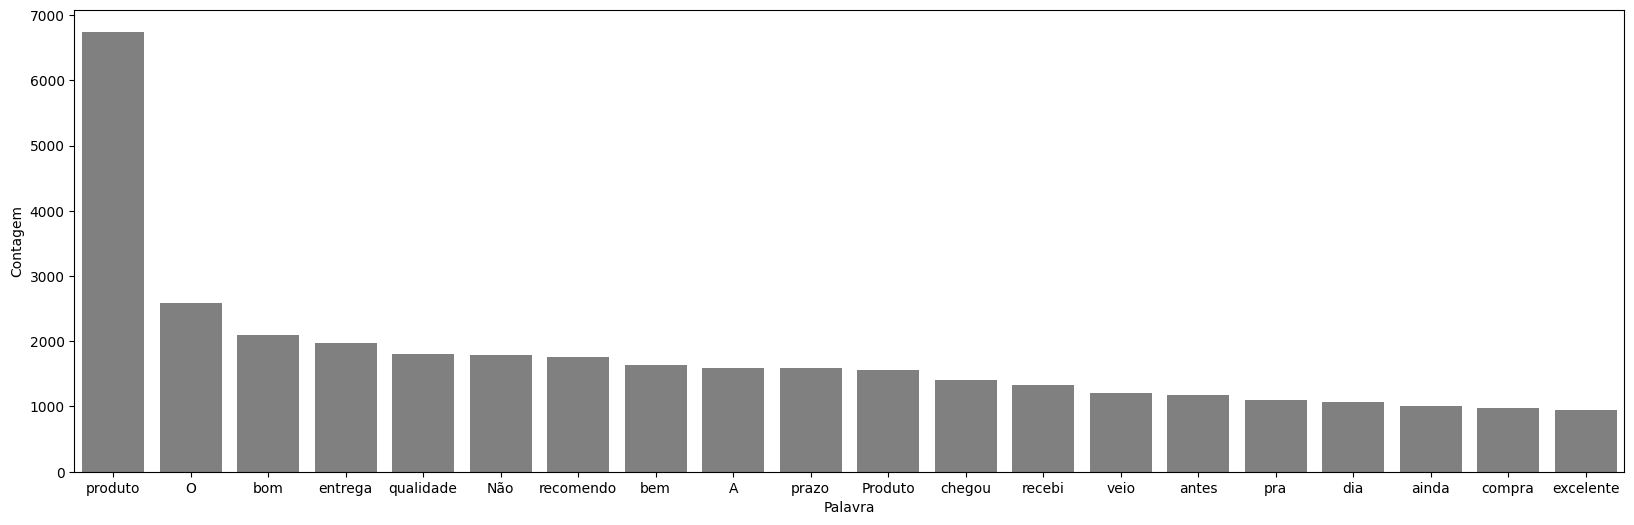

In [61]:
grafico_frequencia(df, 'tratamento_2',20)

##**Removendo acentuação**

In [ ]:
# biblioteca para tirar acentuação(nao existente no colab)
#pip install unidecode

SyntaxError: invalid syntax (4204466690.py, line 2)

In [64]:
import unidecode

frase = 'Um aparelho ótima performance preço bem menor outros aparelhos marcas conhecidas performance semelhante'
frase = unidecode.unidecode(frase)
print(frase)

Um aparelho otima performance preco bem menor outros aparelhos marcas conhecidas performance semelhante


In [65]:
sem_acentos = [unidecode.unidecode(texto) for texto in df['tratamento_2']]

In [66]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in palavras_irrelevantes]

In [67]:
df['tratamento_3'] = sem_acentos

frase_processada = []

for opiniao in df['tratamento_3']:
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [palavras for palavras in palavras_texto if palavras not in stopwords_sem_acento]
  frase_processada.append(' '.join(nova_frase))

df['tratamento_4'] = frase_processada

In [68]:
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       tratamento_1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   

                                        tratamento_2  \
0     Esse smartphone superou expectativas recomendo   
1    cheiro desagradavel pra incomoda nao recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        tratamento_3  \
0     Esse smartphone superou expectativas recomendo   
1    cheiro desagradavel pra incomoda nao recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        tratamento_4  
0     Esse smartphone superou expectativas recomendo  
1        cheiro desagradavel pra incomoda recomendoo  
2  Eu fiz compra loja entregou produto compra fei...  
3  Atendeu expectativas achei luz ruim nada dific...  
4  Gostei achei ficou desejar qualidade fotos Ach...

In [ ]:
# verifando os dados antes da alteração/remoção das acentuações
df['tratamento_2'][70]

'Melhor compra fiz últimos tempos Produto barato útil Produto robusto leve O teclado proporciona digitação confortável mouse preciso O teclado mouse usam apenas receptor economizando número portas USB computador Me livrei incomodo fios espaço trabalho ficou limpo harmonioso Ademais tudo parece bastante durável safisfeito Recomendo todos'

In [ ]:
# verifando os dados após da alteração/remoção das acentuações
df['tratamento_3'][70]

'Melhor compra fiz ultimos tempos Produto barato util Produto robusto leve O teclado proporciona digitacao confortavel mouse preciso O teclado mouse usam apenas receptor economizando numero portas USB computador Me livrei incomodo fios espaco trabalho ficou limpo harmonioso Ademais tudo parece bastante duravel safisfeito Recomendo todos'

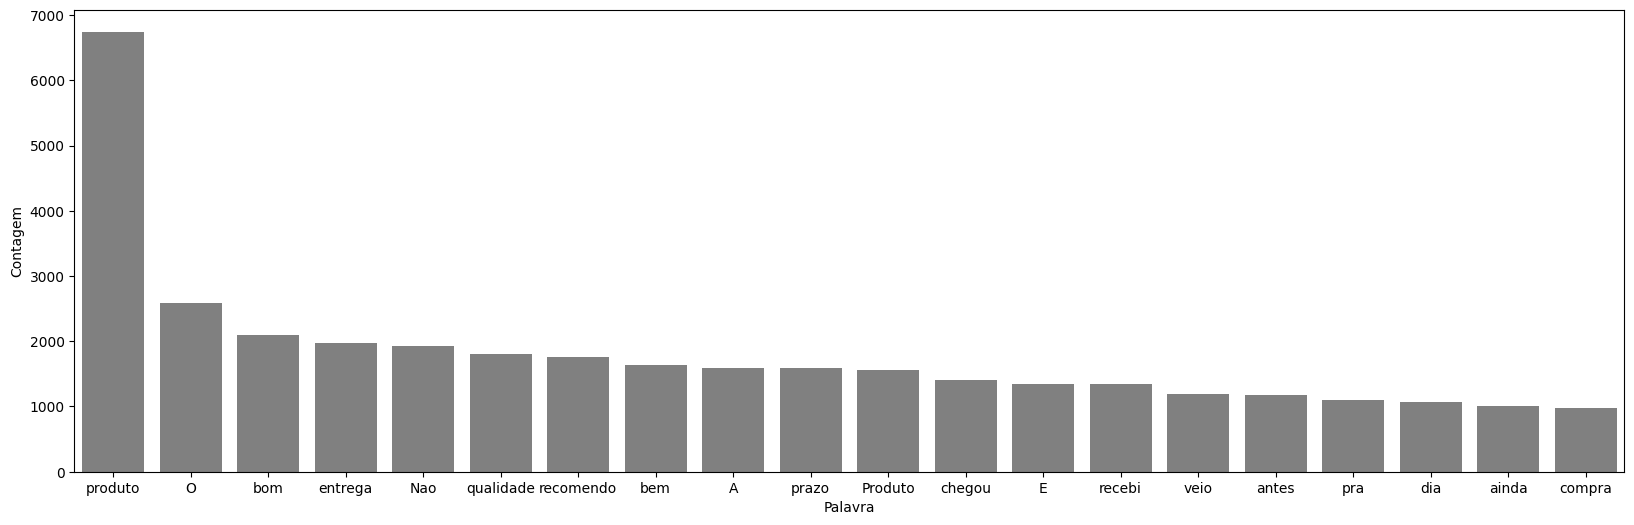

In [71]:
grafico_frequencia(df, 'tratamento_3', 20)

**Uniformizando o texto**

In [72]:
frase = 'Bom produto otimo custo beneficio Recomendo Confortavel bem acabado'
print(frase.lower())

bom produto otimo custo beneficio recomendo confortavel bem acabado


In [73]:
frase_processada = []

for opiniao in df['tratamento_3']:
  opiniao = opiniao.lower()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra not in stopwords_sem_acento]
  frase_processada.append(' '.join(nova_frase))

df['tratamento_4'] = frase_processada

In [74]:
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       tratamento_1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   

                                        tratamento_2  \
0     Esse smartphone superou expectativas recomendo   
1    cheiro desagradavel pra incomoda nao recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        tratamento_3  \
0     Esse smartphone superou expectativas recomendo   
1    cheiro desagradavel pra incomoda nao recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        tratamento_4  
0          smartphone superou expectativas recomendo  
1        cheiro desagradavel pra incomoda recomendoo  
2  fiz compra loja entregou produto compra feita ...  
3  atendeu expectativas achei luz ruim nada dific...  
4  gostei achei ficou desejar qualidade fotos ach...

In [ ]:
# verifando os dados antes da uniformização dos dados
df['tratamento_3'][3]

'Atendeu expectativas achei luz ruim nada dificulte funcionamento'

In [ ]:
# verifando os dados depois da uniformização dos dados
df['tratamento_4'][3]

'atendeu expectativas achei luz ruim nada dificulte funcionamento'

In [ ]:
# chamando a função para verificar a acurancia andurante o tratamento 1
classificar_texto(df,'tratamento_1', 'sentimento')

Acurácia do modelo com 'tratamento_1': 81.09%


In [ ]:
# chamando a função para verificar a acurancia andurante o tratamento 4
classificar_texto(df, 'tratamento_4', 'sentimento')

Acurácia do modelo com 'tratamento_4': 83.75%


**Utilizando outras técnicas de processamento de texto**

##**Simplificando as palavras**

#tecnica para simplificarção de palavras (stemming) - reduz a palavra ao rapical.
#Exemplo de fazer com  ao inicio...querem dizer a mesma coisa, mas com significados diferentes
# Eu gostei do produto(frase 1)
# Embora eu tenha gostado do produto, a entrega foi muito demorada (frase 2)

In [ ]:
stemmer = nltk.RSLPStemmer()
#Exemplo:
stemmer.stem('gostei')
stemmer.stem('gostado')
stemmer.stem('gostou')

'gost'

In [81]:
frase_processada = []

for opiniao in df['tratamento_4']:
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [stemmer.stem(palavra) for palavra in palavras_texto]
  frase_processada.append(' '.join(nova_frase))

df['tratamento_5'] = frase_processada

In [82]:
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       tratamento_1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   

                                        tratamento_2  \
0     Esse smartphone superou expectativas recomendo   
1    cheiro desagradavel pra incomoda nao recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        tratamento_3  \
0     Esse smartphone superou expectativas recomendo   
1    cheiro desagradavel pra incomoda nao recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        tratamento_4  \
0          smartphone superou expectativas recomendo   
1        cheiro desagradavel pra incomoda recomendoo   
2  fiz compra loja entregou produto compra feita ...   
3  atendeu expectativas achei luz ruim nada dific...   
4  gostei achei ficou desejar qualidade fotos ach...   

                                        tratamento_5  
0                       smartphon super expect recom  
1              cheir desagrada pra incomod recomendo  
2  fiz compr loj entreg produt compr feit carta c...  
3     atend expect ach luz ruim nad dificult funcion  
4         gost ach fic desej qual fot ach bem melhor

In [83]:
df['tratamento_4'][3]

'atendeu expectativas achei luz ruim nada dificulte funcionamento'

In [84]:
df['tratamento_5'][3]

'atend expect ach luz ruim nad dificult funcion'

In [85]:
classificar_texto(df, 'tratamento_5', 'sentimento')

Acurácia do modelo com 'tratamento_5': 85.11%


**Determinando a importância das palavras**

In [ ]:
# tecnica para dar pesos/importancia as palavras para diferenciar
#import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer

frases = ['comprei um ótimo produto', 'comprei um produto péssimo']

tfidf = TfidfVectorizer(lowercase=False, max_features=50)
matriz = tfidf.fit_transform(frases)
pd.DataFrame(matriz.todense(),
             columns=tfidf.get_feature_names_out())

comprei   produto   péssimo        um     ótimo
0  0.448321  0.448321  0.000000  0.448321  0.630099
1  0.448321  0.448321  0.630099  0.448321  0.000000

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Inicializando o TfidfVectorizer
tfidf = TfidfVectorizer()

# Transformando o texto com o Tfidf
tfidf_bruto = tfidf.fit_transform(df['avaliacao'])

# Separando em dados de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(tfidf_bruto, df['sentimento'], random_state=4978)

# Inicializando o modelo de regressão logística
regressao_logistica = LogisticRegression()

# Treinando o modelo
regressao_logistica.fit(X_treino, y_treino)

# Calculando a acurácia
acuracia_tfidf_bruto = regressao_logistica.score(X_teste, y_teste)

# Exibindo a acurácia
print(f'Acurácia do modelo: {acuracia_tfidf_bruto * 100:.2f}%')

Acurácia do modelo: 92.98%


In [88]:
tfidf_tratados = tfidf.fit_transform(df['tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(tfidf_tratados, df['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_tratados = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia do modelo: {acuracia_tfidf_tratados *100:.2f}%')

Acurácia do modelo: 91.87%


##**Capturando contextos**

In [89]:
from nltk import ngrams

frase = 'Comprei um produto ótimo'
frase_separada = token_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

[('Comprei', 'um'), ('um', 'produto'), ('produto', 'ótimo')]

In [90]:
tfidf_50 = TfidfVectorizer(lowercase=False, max_features=50, ngram_range=(1,2))
vetor_tfidf = tfidf_50.fit_transform(df['tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia do modelo com 50 features e ngrams: {acuracia_tfidf_ngrams * 100:.2f}%')

Acurácia do modelo com 50 features e ngrams: 85.22%


**Explorando a quantidade de features na vetorização**

In [91]:
tfidf_100 = TfidfVectorizer(lowercase=False, max_features=100, ngram_range=(1,2))
vetor_tfidf = tfidf_100.fit_transform(df['tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia do modelo com 100 features e ngrams: {acuracia_tfidf_ngrams * 100:.2f}%')

Acurácia do modelo com 100 features e ngrams: 88.21%


In [96]:
tfidf_1000 = TfidfVectorizer(lowercase=False, max_features=1000, ngram_range=(1, 2))
vetor_tfidf = tfidf_1000.fit_transform(df['tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(X_teste, y_teste)

# Exibindo a acurácia
print(f'Acurácia do modelo com 1000 features e ngrams: {acuracia_tfidf_ngrams * 100:.2f}%')

Acurácia do modelo com 1000 features e ngrams: 91.85%


In [93]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2))
vetor_tfidf = tfidf.fit_transform(df['tratamento_5'])
X_treino, X_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df['sentimento'], random_state=4978)
regressao_logistica.fit(X_treino, y_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(X_teste, y_teste)
print(f'Acurácia do modelo com todas as features e ngrams: {acuracia_tfidf_ngrams * 100:.2f}%')

Acurácia do modelo com todas as features e ngrams: 91.85%


In [94]:
vetor_tfidf.shape

(15501, 114123)

⚠️ Executar novamente o código do `tfidf_1000` antes de executar a célula abaixo:

In [97]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index=tfidf_1000.get_feature_names_out()
)

In [98]:
pesos.nlargest(50, 0)

0
otim          7.808669
excel         7.449268
bom           5.990104
perfeit       5.078838
ador          5.034260
satisfeit     4.816196
rap           4.232814
lind          3.762726
ame           3.509609
maravilh      3.477517
boa           2.853934
expect        2.805352
bast          2.771108
surpreend     2.768510
sup           2.736121
recom         2.716303
gost          2.696611
bem           2.594271
facil         2.549400
conhec        2.494977
exat          2.457021
otim produt   2.280942
ant           2.250021
parab         2.242019
top           2.237539
ant praz      2.203972
obrig         2.099760
bonit         2.083441
facilit       2.025213
ideal         2.014983
amou          2.009027
gost produt   1.905817
produt excel  1.886860
unic          1.868087
necess        1.854163
atend         1.822574
incri         1.810025
tud           1.782914
bom produt    1.762308
acord         1.717719
feliz         1.682100
cheg ant      1.681544
conform       1.680358
produt otim   1.666303
sup recom     1.605002
melhor        1.584076
produt bom    1.553070
cert          1.542012
util          1.532237
duvid         1.525344

In [99]:
pesos.nsmallest(50,0)

0
pess         -4.632123
receb        -4.067055
ruim         -4.059795
frac         -3.694803
horri        -3.376634
defeit       -3.033516
fragil       -3.026329
decepcion    -2.899696
devolv       -2.893880
dinh         -2.692323
vei          -2.656039
pag          -2.417861
solt         -2.374786
quebr        -2.341997
ning         -2.289400
me           -2.270050
pess qual    -2.230152
receb produt -2.174370
tent         -2.135781
baix         -2.097195
devoluca     -2.093820
inferi       -2.082713
avali        -2.067197
insatisfeit  -2.063115
lig          -2.037871
rasg         -1.994937
baix qual    -1.984931
troc         -1.952566
queim        -1.881834
lent         -1.869798
fal          -1.868140
arrepend     -1.846433
fech         -1.836922
fot          -1.817790
porc         -1.810579
tr           -1.784346
cancel       -1.781236
hoj          -1.776404
mand         -1.772616
pi           -1.761921
sai          -1.756841
encaix       -1.736008
err          -1.730392
absurd       -1.728696
nad          -1.696266
produt       -1.694031
mes          -1.687258
mal          -1.685566
plac         -1.674567
diz          -1.634376

#Testando o modelo de classificação**

##**Salvando e carregando o modelo**

In [100]:
import joblib

joblib.dump(tfidf_1000, 'tfidf_vectorizer.pkl')
joblib.dump(regressao_logistica, 'modelo_regressao_logistica.pkl')

['modelo_regressao_logistica.pkl']

In [101]:
tfidf = joblib.load('tfidf_vectorizer.pkl')
regressao_logistica = joblib.load('modelo_regressao_logistica.pkl')

##**Criando uma função para processar novos dados**

In [102]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
token_pontuacao = tokenize.WordPunctTokenizer()
stemmer = nltk.RSLPStemmer()

def processar_avaliacao(avaliacao):
  # passo 1
  tokens = token_pontuacao.tokenize(avaliacao)

  # passo 2
  frase_processada = [palavra for palavra in tokens if palavra.lower() not in palavras_irrelevantes]

  # passo 3
  frase_processada = [palavra for palavra in frase_processada if palavra.isalpha()]

  # passo 4
  frase_processada = [unidecode.unidecode(palavra) for palavra in frase_processada]

  # passo 5
  frase_processada = [stemmer.stem(palavra) for palavra in frase_processada]

  return ' '.join(frase_processada)

##**Classificando novas avaliações**

In [103]:
# Novas avaliações para prever
novas_avaliacoes = ["Ótimo produto, super recomendo!",
                 "A entrega atrasou muito! Estou decepcionado com a compra",
                 "Muito satisfeito com a compra. Além de ter atendido as expectativas, o preço foi ótimo",
                 "Horrível!!! O produto chegou danificado e agora estou tentando fazer a devolução.",
                 '''Rastreando o pacote, achei que não fosse recebê-lo, pois, na data prevista, estava sendo entregue em outra cidade.
                 Mas, no fim, deu tudo certo e recebi o produto.Produto de ótima qualidade, atendendo bem as minhas necessidades e por
                 um preço super em conta.Recomendo.''']

In [104]:
novas_avaliacoes_processadas = [processar_avaliacao(avaliacao) for avaliacao in novas_avaliacoes]
novas_avaliacoes_processadas

['otim produt sup recom',
 'entreg atras decepcion compr',
 'satisfeit compr alem ter atend expect prec otim',
 'horri produt cheg danific agor tent faz devoluca',
 'rastre pacot ach receb lo poi dat prev send entreg outr cidad fim deu tud cert receb produt produt otim qual atend bem necess prec sup cont recom']

In [105]:
novas_avaliacoes_tfidf = tfidf.transform(novas_avaliacoes_processadas)

predicoes = regressao_logistica.predict(novas_avaliacoes_tfidf)

df_previsoes = pd.DataFrame({
    'Avaliação': novas_avaliacoes,
    'Sentimento previsto': predicoes
})

df_previsoes

Avaliação Sentimento previsto
0                    Ótimo produto, super recomendo!            positivo
1  A entrega atrasou muito! Estou decepcionado co...            negativo
2  Muito satisfeito com a compra. Além de ter ate...            positivo
3  Horrível!!! O produto chegou danificado e agor...            negativo
4  Rastreando o pacote, achei que não fosse receb...            positivo